In [1]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
tf.reset_default_graph()

In [4]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [5]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.001%


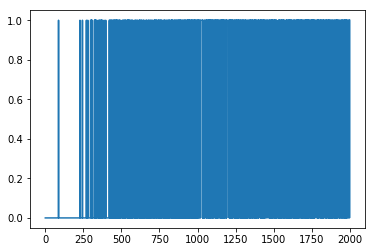

In [7]:
plt.plot(rList)

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_nodes_hl4 = 500

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

def print_shape(obj):
    print(obj.get_shape().as_list())

def neural_network_model(data):
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([784,
                                                               n_nodes_hl1])),
                      'biases':
                      tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':
                      tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':
                      tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':
                      tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':
                      tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    hidden_4_layer = {'weights':
                      tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl4])),
                      'biases':
                      tf.Variable(tf.random_normal([n_nodes_hl4]))}

    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl4,
                                                             n_classes])),
                    'biases': tf.Variable(tf.random_normal([n_classes]))}
    print_shape(data)
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']),
                hidden_1_layer['biases'])
    print_shape(l1)
    l1 = tf.nn.relu(l1)
    print_shape(l1)
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']),
                hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']),
                hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3, output_layer['weights']),
                    output_layer['biases'])
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']),
               hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)    

    output = tf.add(tf.matmul(l4, output_layer['weights']),
                   output_layer['biases'])
    return output


def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
                          (logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    hm_epochs = 10

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples / batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x,
                                                              y: epoch_y})
                epoch_loss += c
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:',
                  epoch_loss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval({x: mnist.test.images, y:
                                          mnist.test.labels}))


train_neural_network(x)

In [ ]:
def my_conv_net(input_data):
    
    batch_size = -1
    learning_rate = 0.005
    evaluation_size = 500
#    image_width = ttrainData[0].shape[0]
#    image_height = ttrainData[0].shape[1]
    image_width = 16
    image_height = 16
#    target_size = max(ttrainLabels) + 1
    num_channels = 1
    generations = 500
    eval_every = 5
    conv1_features = 32
    conv2_features = 64
    max_pool_size1 = 2
    max_pool_size2 = 2
    fully_connected_size1 = 100
    dropout_prob = 0.75
    
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1], strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')    
    
    print("input_data>>>: ", input_data)
    print("conv1_weight>>>: ", conv1_weight)
    print("conv1_weight get shape: ", conv1_weight.get_shape())
    print("conv1_bias>>>: ", conv1_bias)
    print("conv1>>>: ", conv1)
    print("relu1>>>: ", relu1)
    print("max_pool1>>>: ", max_pool1)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")
    
    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1], strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
    
    print("conv2_weight>>>: ", conv2_weight)
    print("conv2_bias>>>: ", conv2_bias)
    print("conv2>>>: ", conv2)
    print("relu2>>>: ", relu2)
    print("max_pool2>>>: ", max_pool2)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")
    
    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool2.get_shape().as_list()
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])
    
    # First Fully Connected Layer
    print("flat_output ***: ", type(flat_output))
    print("flat_output ***: ", flat_output)
    print("full1_weight ***: ", type(full1_weight))
    print("full1_weight ***: ", full1_weight)
    print("full1_bias ***: ", type(full1_bias))
    print("full1_bias ***: ", full1_bias)
    
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))
    
    # Second Fully Connected Layer
    final_model = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    # Add dropout
    final_model_output = tf.nn.dropout(final_model, dropout)
    
    return(final_model_output)

In [ ]:
final_model_output

In [ ]:
ttrainData type: <class 'numpy.ndarray'>
ttrainData shape: (279, 16, 16)
train_data type: <class 'numpy.ndarray'>
teval_dataArray shape: (120, 16, 16)
ttrainData[0]:  [[ 31.  30.  29. ...,  34.  41.  43.]
 [ 31.  31.  30. ...,  33.  38.  40.]
 [ 31.  32.  32. ...,  32.  37.  39.]
 ..., 
 [ 26.  30.  37. ...,  48.  52.  54.]
 [ 32.  34.  39. ...,  45.  46.  45.]
 [ 42.  41.  42. ...,  45.  41.  37.]]
ttrainData[0]:  (16, 16)
ttestData[0]:  [[ 116.  101.   86. ...,   96.   89.   82.]
 [ 125.  111.   96. ...,   91.   86.   81.]
 [ 130.  119.  106. ...,   88.   87.   85.]
 ..., 
 [ 120.  117.  116. ...,  107.  107.  111.]
 [ 123.  120.  120. ...,  115.  114.  118.]
 [ 126.  122.  122. ...,  121.  119.  123.]]
ttestData[0]:  (16, 16)
$$$$$$$$$$$$$$$$$ checking1 $$$$$$$$$$$$$$$$$

image_width:  16
image_height:  16
Type of fully_connected_size1:  <class 'int'>
fully_connected_size1 is:  100
Type of target_size:  <class 'numpy.float64'>
target_size is:  2.0
*********convert float to int 1st way:  2
*********convert float to int:  <class 'int'>
$$$$$$$$$$$$$$$$ checking2 $$$$$$$$$$$$$$$$$$$

checking3
checking4
checking5
input_data>>>:  Tensor("Placeholder_31:0", shape=(-1, 16, 16, 1), dtype=float32)
conv1_weight>>>:  Tensor("Variable/read:0", shape=(4, 4, 1, 32), dtype=float32)
conv1_weight get shape:  (4, 4, 1, 32)
conv1_bias>>>:  Tensor("Variable_1/read:0", shape=(32,), dtype=float32)
conv1>>>:  Tensor("Conv2D_14:0", shape=(100, 16, 16, 32), dtype=float32)
relu1>>>:  Tensor("Relu_20:0", shape=(100, 16, 16, 32), dtype=float32)
max_pool1>>>:  Tensor("MaxPool_14:0", shape=(100, 8, 8, 32), dtype=float32)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

conv2_weight>>>:  Tensor("Variable_2/read:0", shape=(4, 4, 32, 64), dtype=float32)
conv2_bias>>>:  Tensor("Variable_3/read:0", shape=(64,), dtype=float32)
conv2>>>:  Tensor("Conv2D_15:0", shape=(100, 8, 8, 64), dtype=float32)
relu2>>>:  Tensor("Relu_21:0", shape=(100, 8, 8, 64), dtype=float32)
max_pool2>>>:  Tensor("MaxPool_15:0", shape=(100, 4, 4, 64), dtype=float32)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

flat_output ***:  <class 'tensorflow.python.framework.ops.Tensor'>
flat_output ***:  Tensor("Reshape_13:0", shape=(1024, 100), dtype=float32)
full1_weight ***:  <class 'tensorflow.python.ops.variables.Variable'>
full1_weight ***:  Tensor("Variable_4/read:0", shape=(3136, 100), dtype=float32)
full1_bias ***:  <class 'tensorflow.python.ops.variables.Variable'>
full1_bias ***:  Tensor("Variable_5/read:0", shape=(100,), dtype=float32)
Traceback (most recent call last):

  File "<ipython-input-22-1db506e814de>", line 1, in <module>

  
ValueError: Dimensions must be equal, but are 1024 and 3136 for 'MatMul_15' (op: 'MatMul') with input shapes: [100,1024], [3136,100]

In [ ]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
                          (logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    hm_epochs = 10

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples / batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x,
                                                              y: epoch_y})
                epoch_loss += c
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:',
                  epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval({x: mnist.test.images, y:
                                          mnist.test.labels}))


train_neural_network(x)

In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see http://stackoverflow.com/a/19343/3343043 for
    # detailed explanation).
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.uint8)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

num_episodes = 50
for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for t in count():
        # Select and perform an action
        action = select_action(state)
        _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show()